In [54]:
# Import libraries
import os
import numpy as np
import skimage.io
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [55]:
# Function to load data with pixel normalization
def load_and_resize_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    
    class_to_label = {class_name: i for i, class_name in enumerate(directories)}
    
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".jpg")]
        label = class_to_label[d]
        for f in file_names:
            img = skimage.io.imread(f)
            img_resized = resize(img, (28, 28))
            gray_img = rgb2gray(img_resized)
            images.append(gray_img.flatten())
            labels.append(label)
    return images, labels, class_to_label



In [56]:
train_data_directory = "C:/Food-101-minimized-main/train"
test_data_directory = "C:/Food-101-minimized-main/test"


# Load training data
train_data, train_labels, class_to_label  = load_and_resize_data(train_data_directory)

# Load testing data
test_data, test_labels, class_to_label  = load_and_resize_data(test_data_directory)




C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\Menna\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))


In [70]:
classes = os.listdir(train_data_directory)

In [71]:
print(len(train_data))

print(len(test_data))

print(class_to_label)
print(classes)

1400
600
{'cheesecake': 0, 'hamburger': 1}
['cheesecake', 'hamburger']


In [72]:
# Normalize pixel values between 0 and 1
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.fit_transform(test_data)



In [73]:
# Create a logistic regression model (you can replace this with any other model)
model = LogisticRegression()




In [74]:
# Train the model
model.fit(train_data_normalized, train_labels)




C:\Users\Menna\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
# Make predictions on the test set
y_pred = model.predict(test_data_normalized)




In [76]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
classification_report_str = classification_report(test_labels, y_pred)
conf_matrix = confusion_matrix(test_labels, y_pred)


In [77]:
# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_str)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5883333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       300
           1       0.59      0.60      0.59       300

    accuracy                           0.59       600
   macro avg       0.59      0.59      0.59       600
weighted avg       0.59      0.59      0.59       600

Confusion Matrix:
[[173 127]
 [120 180]]


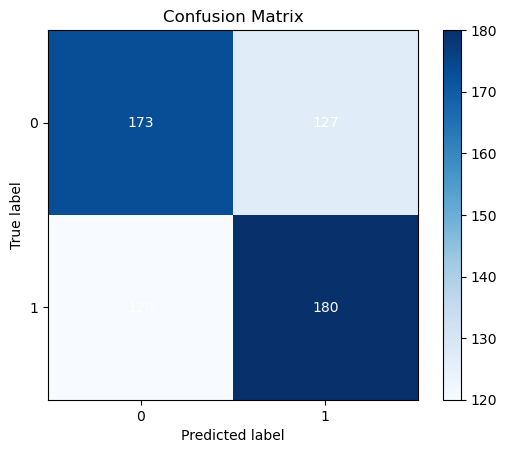

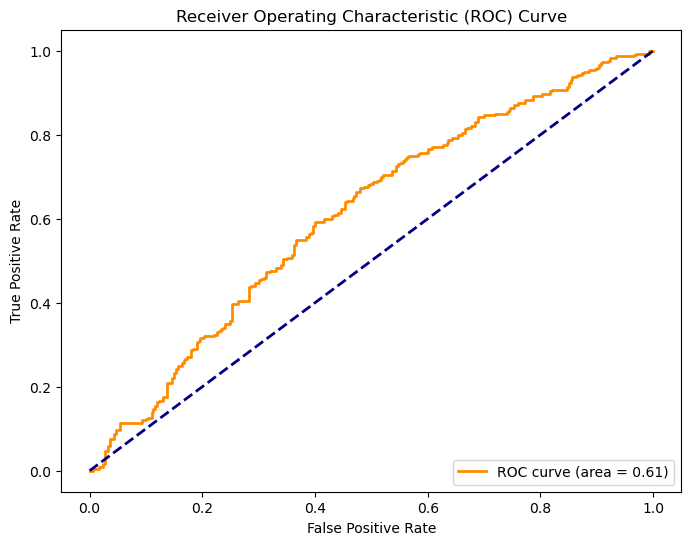

In [78]:
# Plot confusion matrix
plot_confusion_matrix(test_labels, y_pred, title='Confusion Matrix')
plt.show()

# Plot ROC curve
y_probs = model.predict_proba(test_data)
fpr, tpr, thresholds = roc_curve(test_labels, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [79]:
def extract_hog_features(images):
    hog_features_list = []
    
    for img in images:
        # Reshape the flattened image to its original shape
        img = img.reshape((28, 28))
        
        # Calculate HOG features directly on the grayscale image
        hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
        
        # Append the HOG features
        hog_features_list.append(hog_features)
    
    return np.array(hog_features_list)



In [80]:
# Extract HOG features
train_data_hog = extract_hog_features(train_data_normalized)
test_data_hog = extract_hog_features(test_data_normalized)

In [81]:
# Create a logistic regression model
model_hog = LogisticRegression()

# Train the model
model_hog.fit(train_data_hog, train_labels)

# Make predictions on the test set
y_pred_hog = model_hog.predict(test_data_hog)

# Evaluate the model
accuracy_hog = accuracy_score(test_labels, y_pred_hog)
classification_report_str_hog = classification_report(test_labels, y_pred_hog)
conf_matrix_hog = confusion_matrix(test_labels, y_pred_hog)

# Print the results
print(f"Accuracy with HOG features: {accuracy_hog}")
print("Classification Report with HOG features:")
print(classification_report_str_hog)
print("Confusion Matrix with HOG features:")
print(conf_matrix_hog)


Accuracy with HOG features: 0.715
Classification Report with HOG features:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       300
           1       0.70      0.76      0.73       300

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600

Confusion Matrix with HOG features:
[[200 100]
 [ 71 229]]


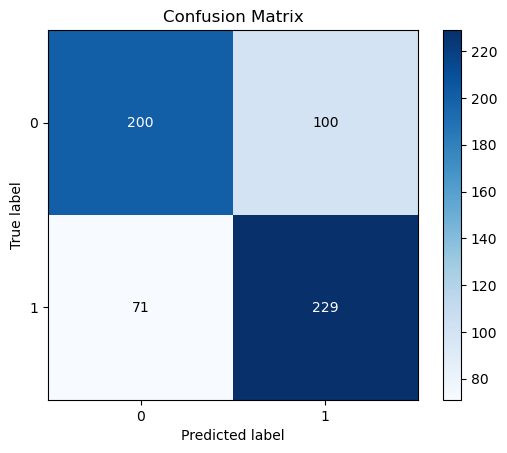

In [84]:
# Plot confusion matrix
plot_confusion_matrix(test_labels, y_pred_hog, title='Confusion Matrix')
plt.show()


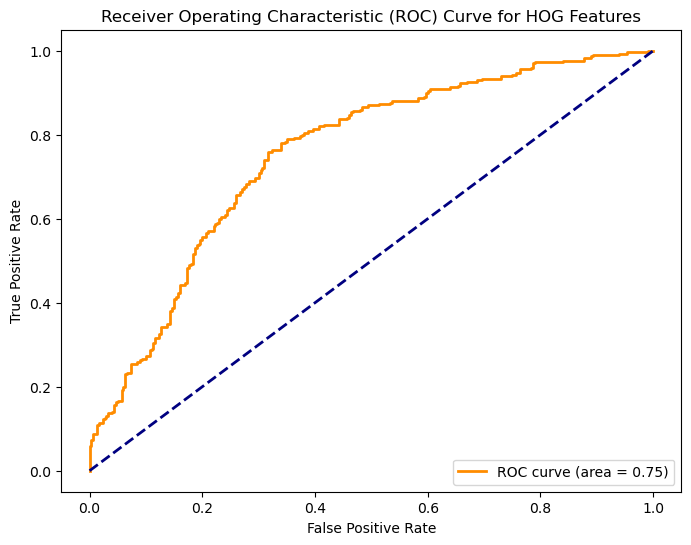

In [85]:
# Plot ROC curve for the model trained on HOG features
y_probs_hog = model_hog.predict_proba(test_data_hog)
fpr_hog, tpr_hog, thresholds_hog = roc_curve(test_labels, y_probs_hog[:, 1])
roc_auc_hog = auc(fpr_hog, tpr_hog)

plt.figure(figsize=(8, 6))
plt.plot(fpr_hog, tpr_hog, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_hog))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for HOG Features')
plt.legend(loc='lower right')
plt.show()
